<a href="https://colab.research.google.com/github/VIVEK818713/Feature-Engineering/blob/main/2_Encoding_Categorical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Encoding Categorical Data

##Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the models to give and improve the predictions.


##There can be two kinds of categorical data:

##1. Nominal data
##2. Ordinal data
##**Nominal data:** This type of categorical data consists of the name variable without any numerical values. You can say there is no relationship or order exist between the categories .For example, in any organization, the name of the different departments like research and development department, human resource department, accounts and billing department etc. or 



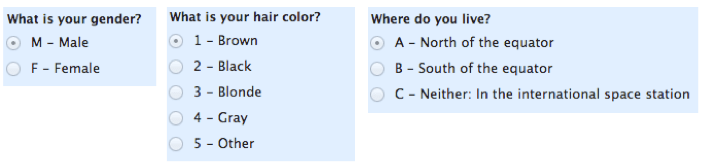



##**Ordinal data:** This type of categorical data consists of a set of orders or scales. For example, a list of patients consists of the level of sugar present in the body of a person which can be divided into high, low and medium classes.



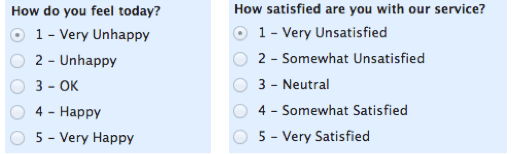

## in your data set there are many columns and we divide it into indepandent(input col) and dependent (output col) columns. or you can say X and y.
## if in X you have any column which have ordinal categorical data then you will apply ordinal encoder 
## but if your target column is categorical then you can not apply ordinal encoding. you have to use label encoder its work is same as ordinal encoder but label encoder is designed for output column.thats why its name is label encoder.

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/customer.csv')
df.head()

## here we are working on only ordinal encoding and label encoding so we are going to not consider nominal encoding so we drop 'age' and 'gender; column from our consideration.

In [ ]:
df = df.iloc[:,2:]

In [ ]:
df.sample(5)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:2],df.iloc[:,-1],train_size=0.2)

In [ ]:
X_train

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

## in categorical column 'review' there are 3 values poor,average,good so we have to assign it into categories parameter of OrdinalEncoder(). as we understand that poor<average<good so OridinalEncoder assign it accordingly value. and we will do same as 'education column (school, ug,pg).
## lets do it..

In [ ]:
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

## first fit on X_train then transform on X_train and X_test as well.

In [ ]:
oe.fit(X_train)

In [ ]:
X_train=oe.transform(X_train)
X_test=oe.transform(X_test)

In [ ]:
X_train

## if you want to check categories then

In [ ]:
oe.categories_

## now lets work on target column in this column we will do **label encoding** for this we will import LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(y_train)

In [ ]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
le.classes_

In [ ]:
y_train

# One Hot Encoding


In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/0machine learning/car.csv')

In [ ]:
df.sample(5)

In [ ]:
df['owner'].value_counts()

In [ ]:
df['brand'].value_counts()

In [ ]:
df['brand'].nunique()

In [ ]:
df['fuel'].value_counts()

##1. OneHotEncoding using Pandas

In [ ]:
pd.get_dummies(df,columns=['fuel','owner'])

##2. K-1 OneHotEncoding

In [ ]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

#3. OneHotEncoding using Sklearn
## Basically we use pandas get_dummy function rarely beacaue it dont remember position of the columns. so we use sklearn OneHot Encoder

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=2)

In [ ]:
X_train.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

## we are applying onehot encoding on 'fuel' and 'owner' only so what will happen it you have to take only these 2 column and apply onehot encoding and after that you will join with the rest columns

In [ ]:
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [ ]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']])

In [ ]:
X_test_new = ohe.transform(X_test[['fuel','owner']])

In [ ]:
X_train_new

In [ ]:
X_train_new.shape

In [ ]:
X_train[['brand','km_driven']]

In [ ]:
X_train[['brand','km_driven']].values

In [ ]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new))